In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trainfile=pd.read_csv("../Pictures/train (copy).csv")
testfile=pd.read_csv("../Pictures/test (copy).csv")
x=trainfile.values
# x_test=testfile.values
print(x.shape)

(19999, 785)


In [3]:
# print(x_test[:20,:5])
x_train=x[:14000,1:]
y_train=x[:14000,0]
x_test=x[14000:,1:]
y_test=x[14000:,0]
m=x_train.shape[0]
n=x_train.shape[1]
print(x_train.shape,y_train.shape,m,n,x_test.shape,y_test.shape)
print(np.unique(y_train,return_counts=True))

(14000, 784) (14000,) 14000 784 (5999, 784) (5999,)
(array([0]), array([14000]))


In [4]:
def drawimg(x):
    img=x.reshape((28,28))
    plt.imshow(img,cmap='gray')
    

In [5]:
def dist(x1,x2):
    return np.sqrt(((x1-x2)**2).sum())

def knn(x,y,query_point,k=10):
    dist_list=[]
    
    for i in range(m):
        d=dist(query_point,x[i])
        dist_list.append((d,y_train[i]))
    
    dist_list=sorted(dist_list)
    dist_list=dist_list[:k]
    
    val=np.array(dist_list)
    t=np.unique(val[:,1],return_counts=True)
    index=t[1].argmax()
    pred=t[0][index]
    return pred

In [12]:
query_x=x_test[0]
query_y=y_test[0]
prediction=knn(x_train,y_train,query_x)

0
0


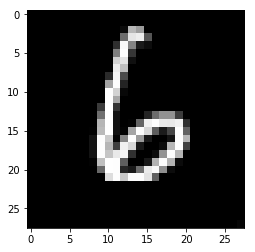

In [13]:
print(int(prediction))
drawimg(query_x)
print(query_y)

In [14]:
cnt = 0
for i in range(100):
    pred = knn(x_train,y_train,x_test[i])
    if(int(pred)==y_test[i]):
        cnt +=1
        
print(cnt/100)

1.0
